In [101]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [100]:
pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
#read data

df = pd.read_csv("..\\project 1\\heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

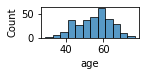

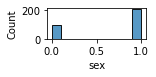

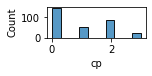

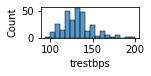

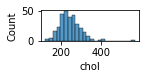

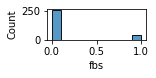

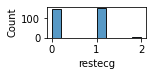

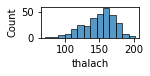

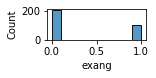

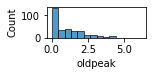

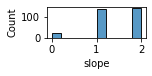

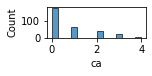

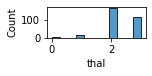

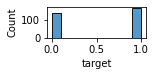

In [9]:
num = 1
for col in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.subplot(6,3,num)
    sns.histplot(df[col])
    plt.show()
    num+=1

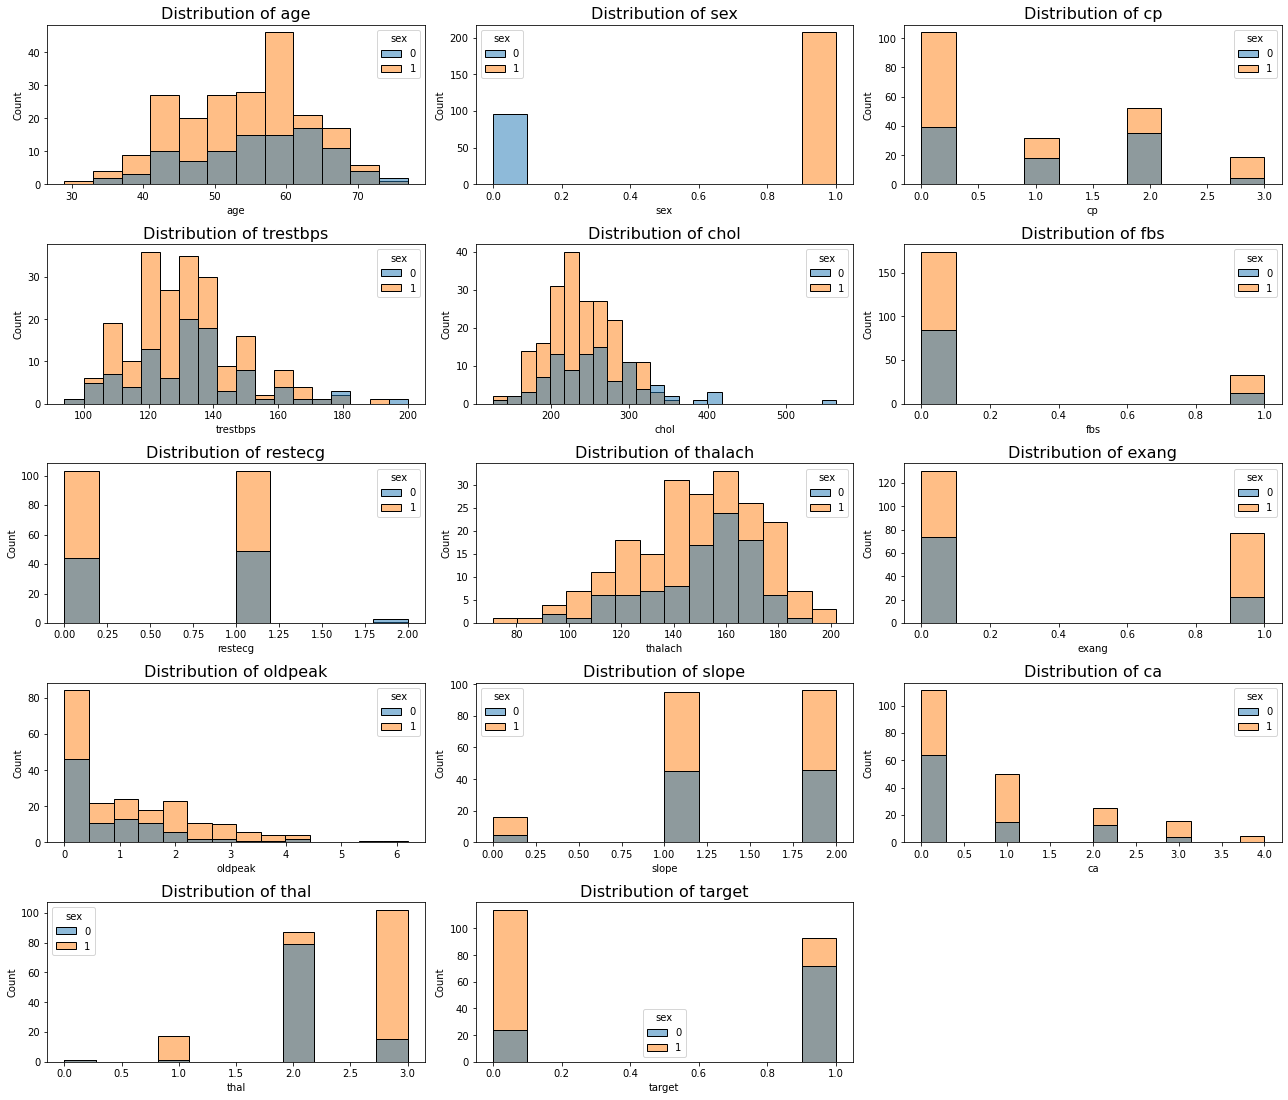

In [11]:
plt.figure(figsize = (18,18))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.subplot(6,3,num)
    sns.histplot(data=df, x=cols, hue='sex') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


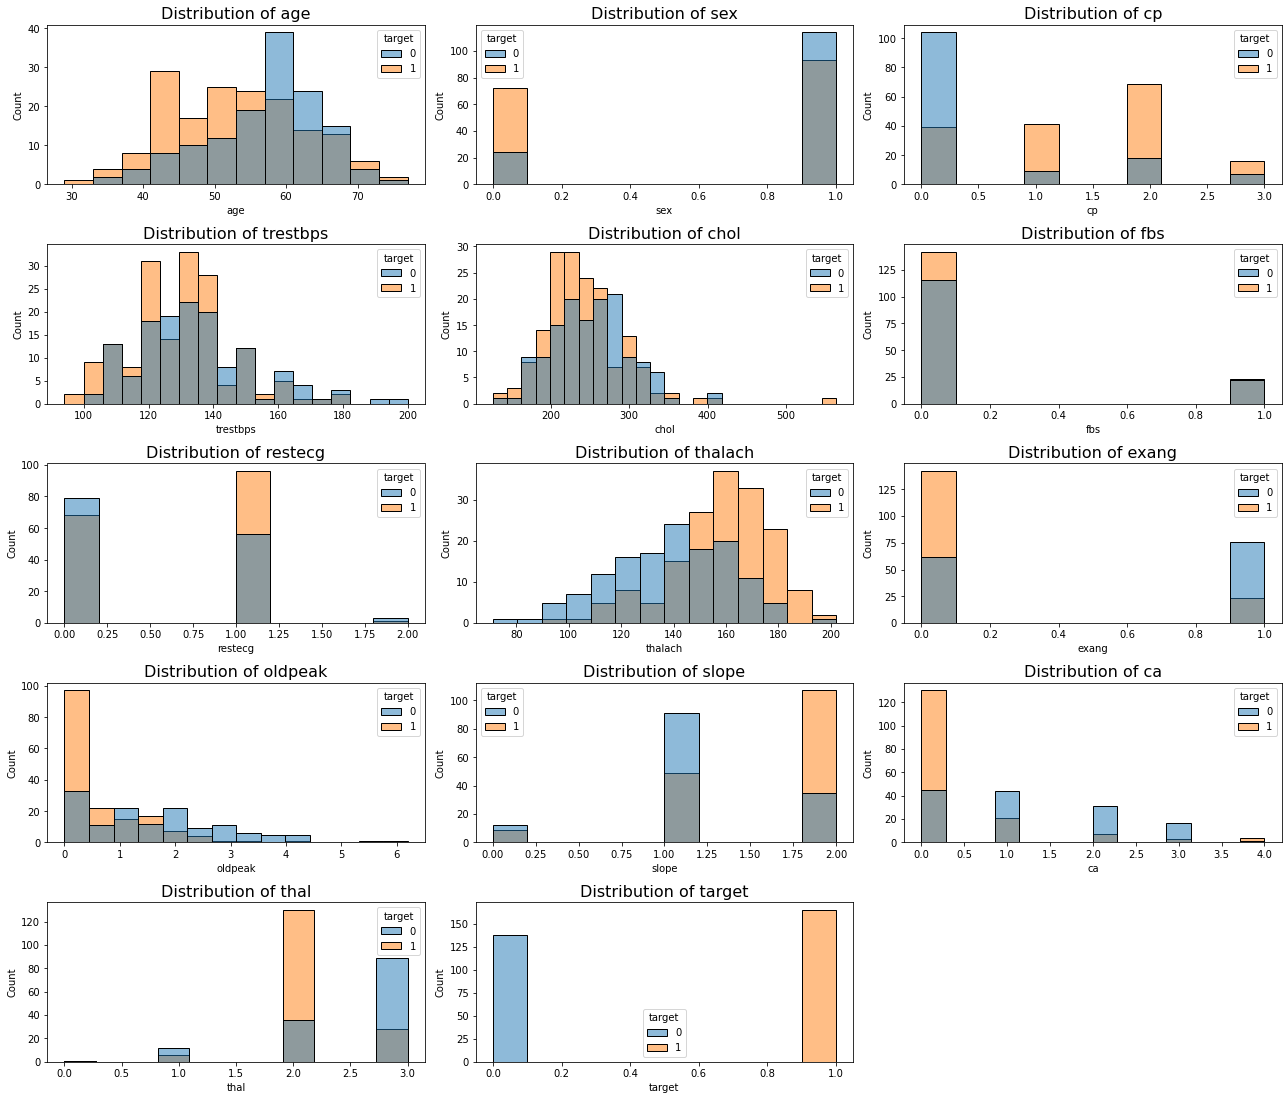

In [12]:
plt.figure(figsize = (18,18))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.subplot(6,3,num)
    sns.histplot(data=df, x=cols, hue='target') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


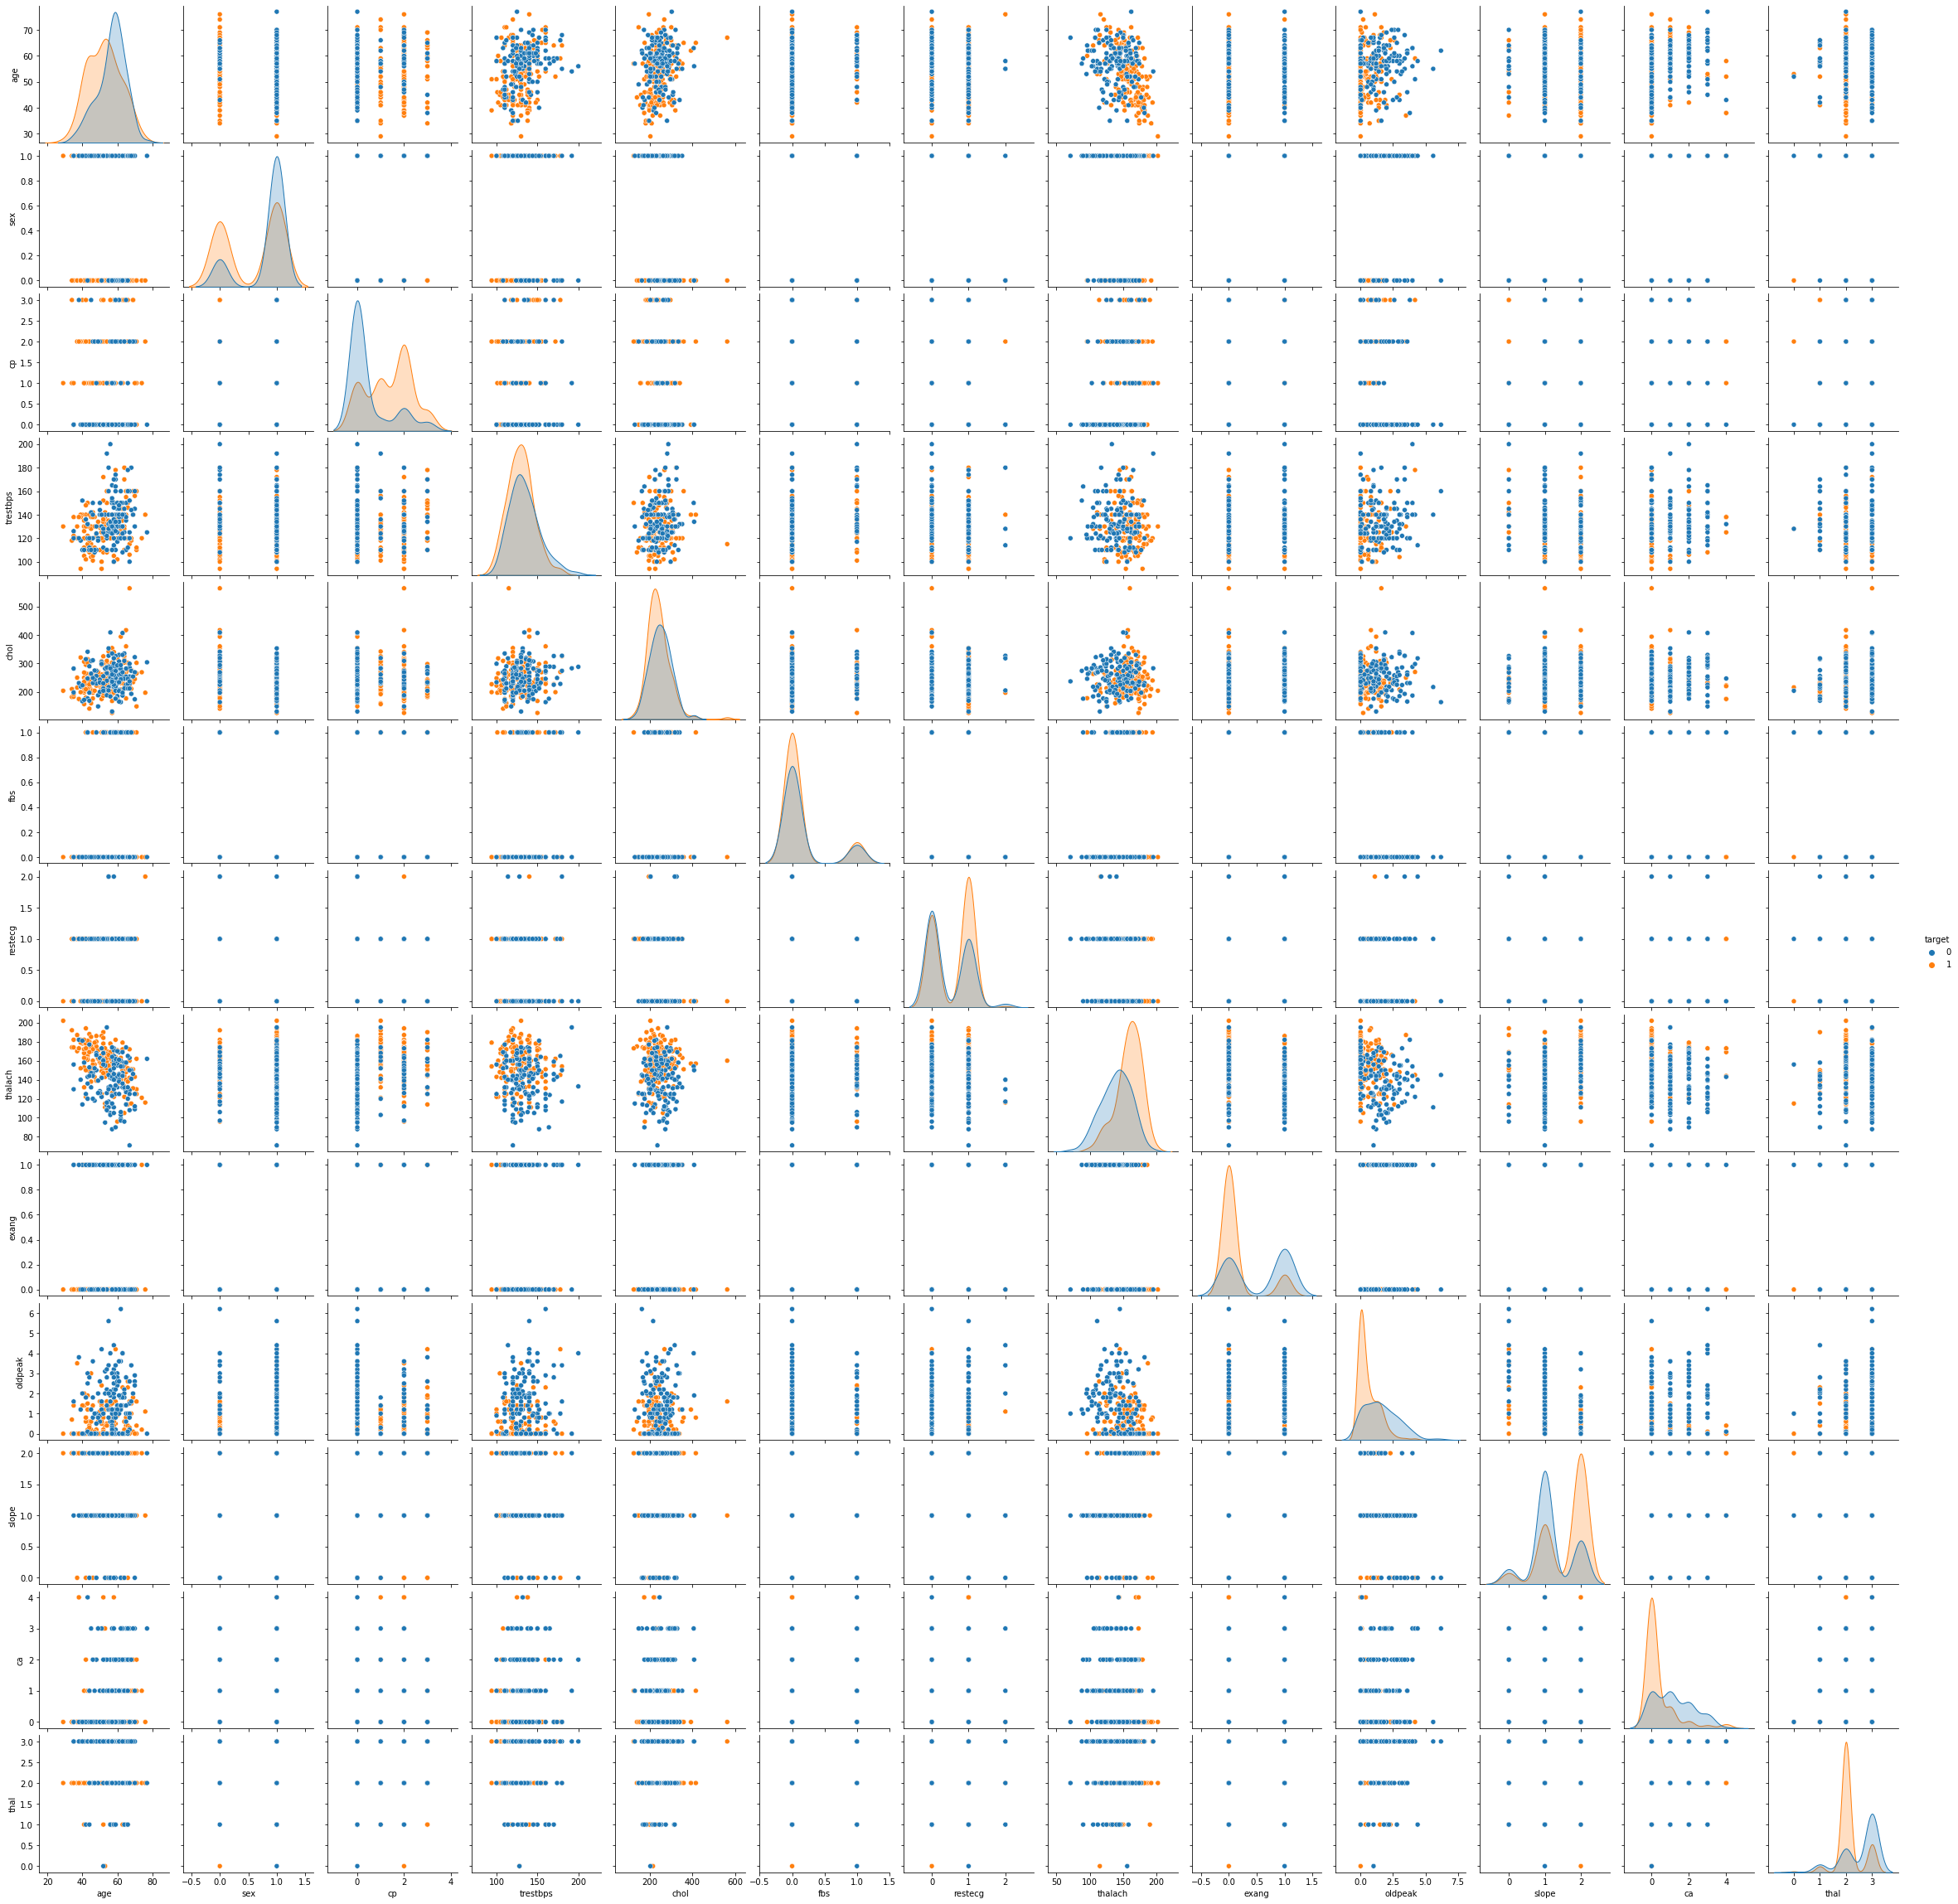

In [13]:
sns.pairplot(data=df,hue='target')

<AxesSubplot:>

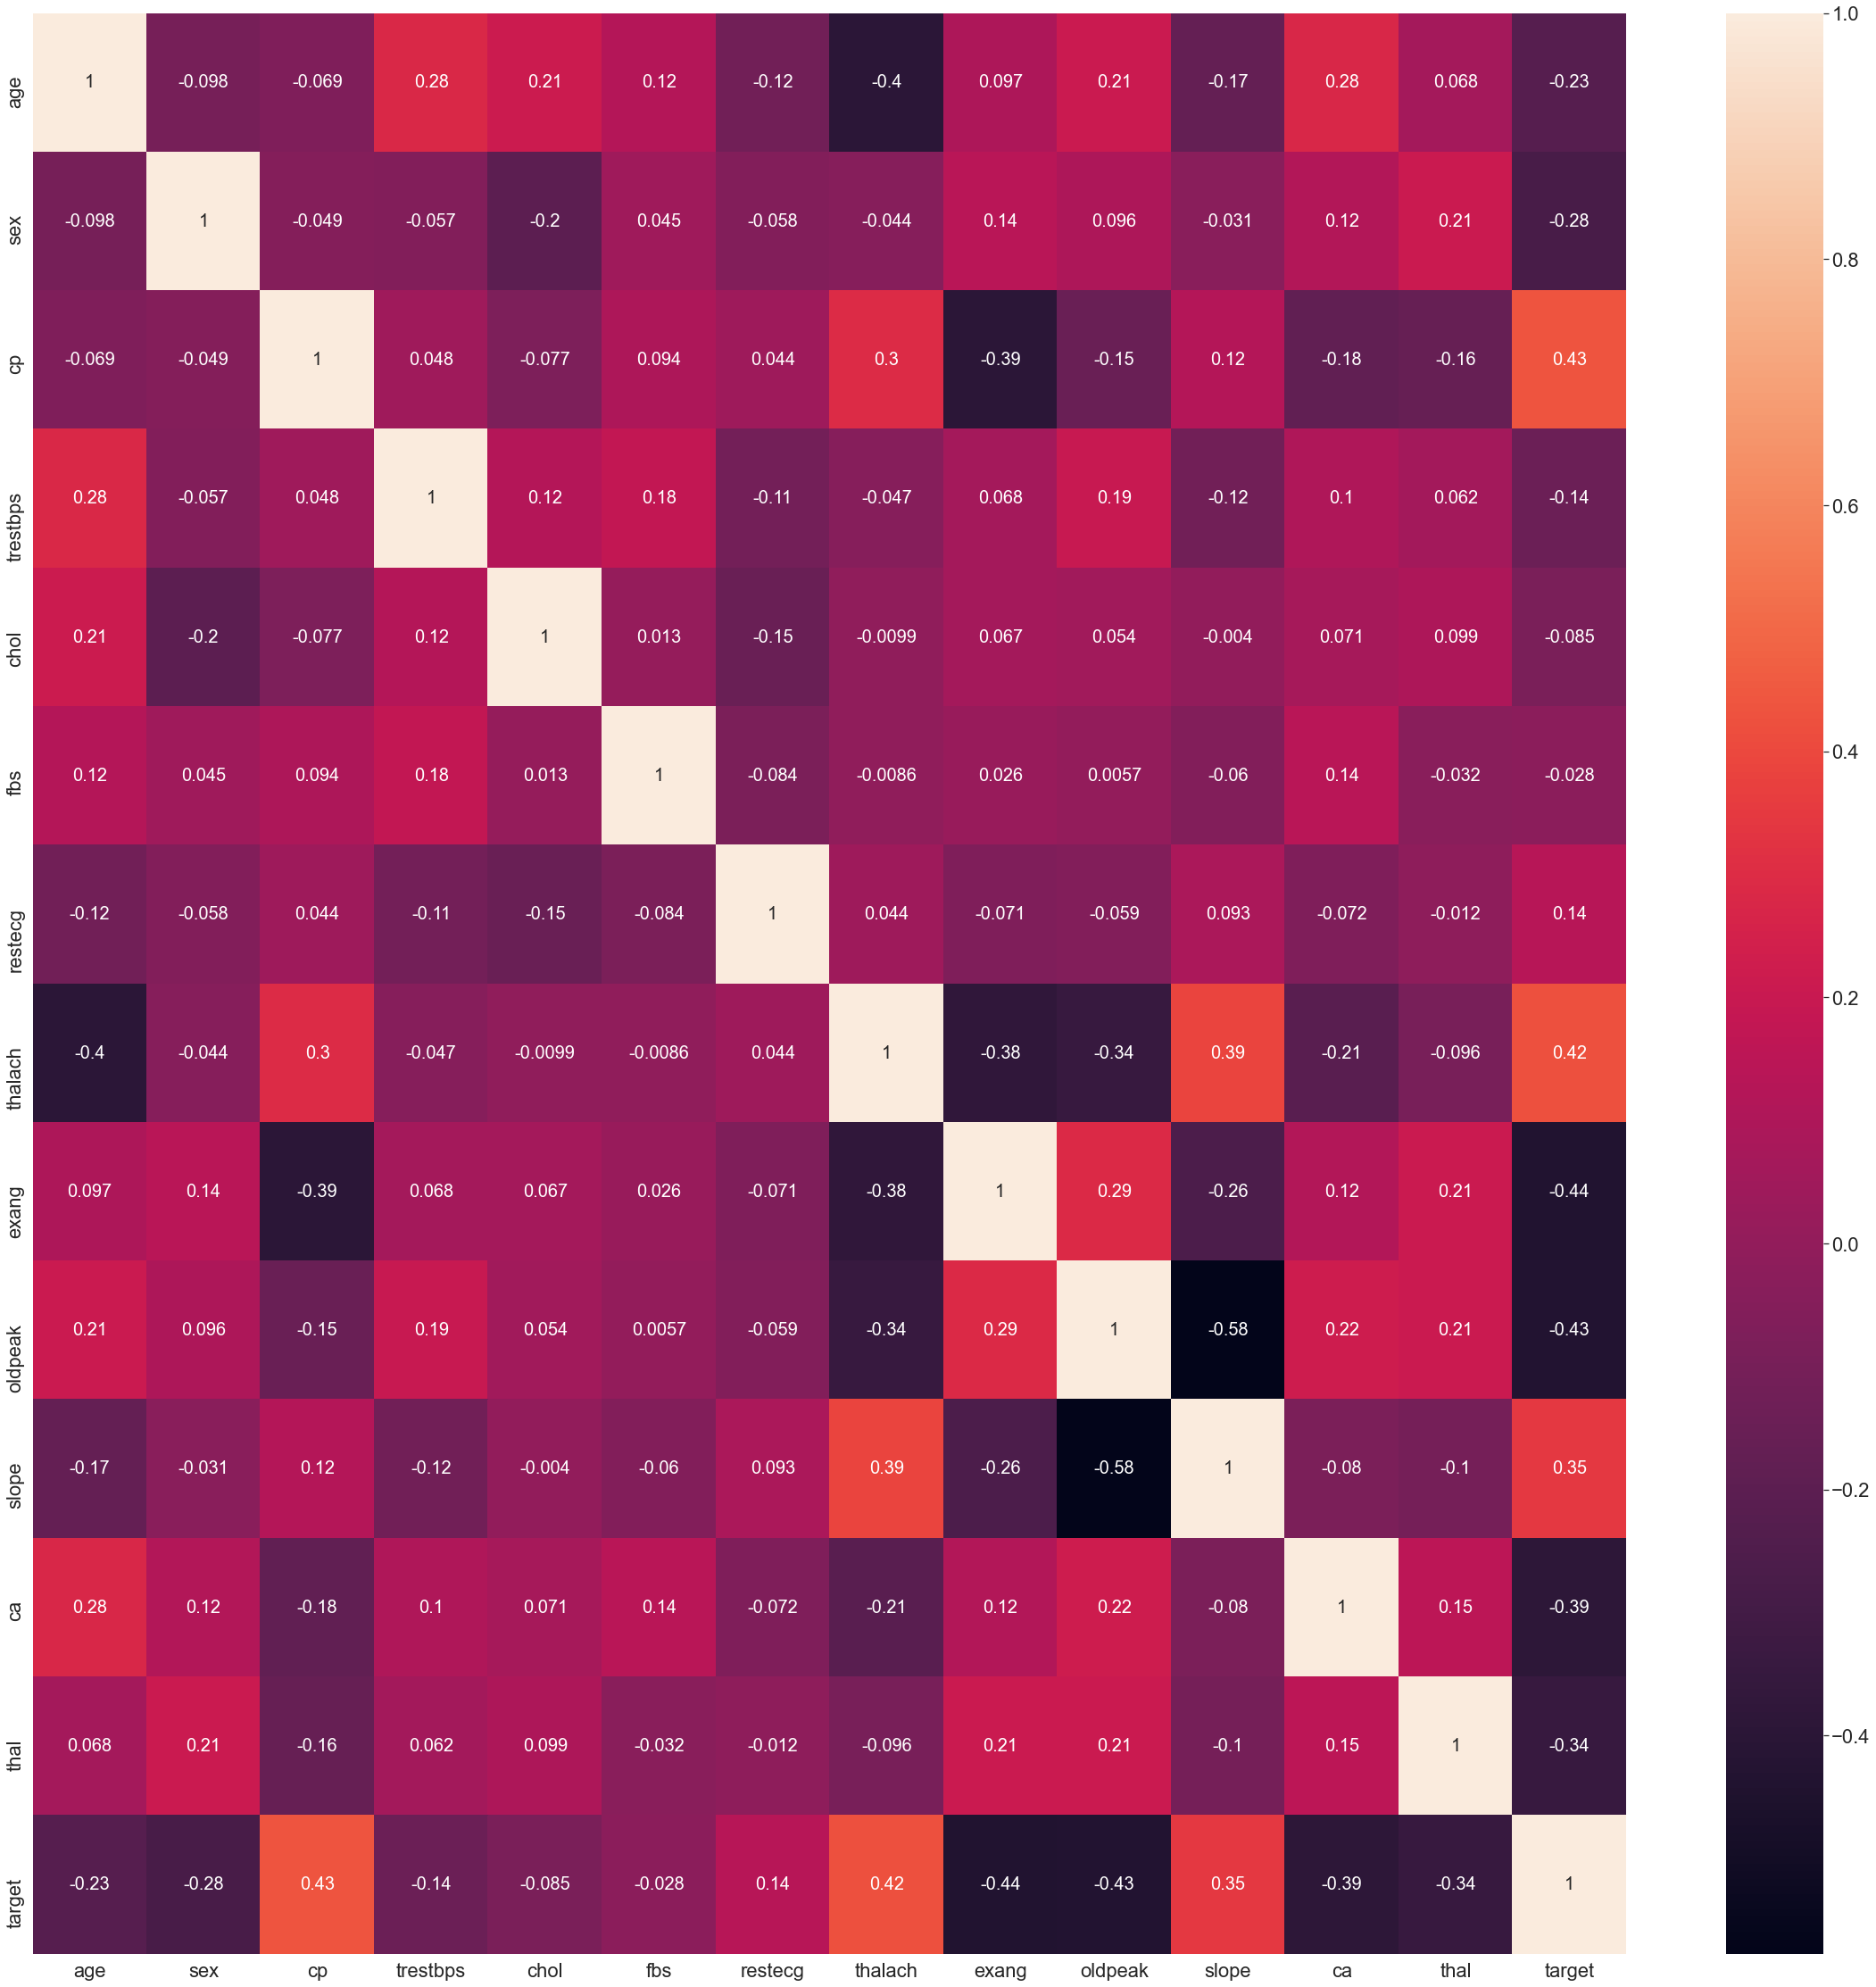

In [14]:
plt.figure(figsize = (40,40))
sns.set(font_scale=2)
sns.heatmap(df.corr(),annot=True,annot_kws={"size":20})

In [15]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
test_col=['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [20]:
test_col

['age',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [21]:
df_ss = df.copy()

In [22]:
features = df_ss[test_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_ss[test_col] = features

In [23]:
df_ss

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,1,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,0,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,1,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,0,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,1,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,1,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,1,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


In [24]:
#(1 = male; 0 = female)
df_ss['sex_orig']=df_ss['sex']
df_ss['sex'].replace((1,0), ('Male','Female'), inplace=True)

In [25]:
df_ss

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_orig
0,0.952197,Male,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1,1
1,-1.915313,Male,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1,1
2,-1.474158,Female,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1,0
3,0.180175,Male,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1,1
4,0.290464,Female,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,Female,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0,0
299,-1.033002,Male,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0,1
300,1.503641,Male,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0,1
301,0.290464,Male,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0,1


In [ ]:
#(1 = male; 0 = female)
df['sex_orig']=df['sex']
df['sex'].replace((1,0), ('Male','Female'), inplace=True)

In [ ]:
plt.figure(figsize = (30,40))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.subplot(6,3,num)
    sns.histplot(data=df, x=cols, hue='sex') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [124]:
df_ss = df_ss.rename(columns={'sex': 'Gender', 'sex_orig': 'Gender_num'})

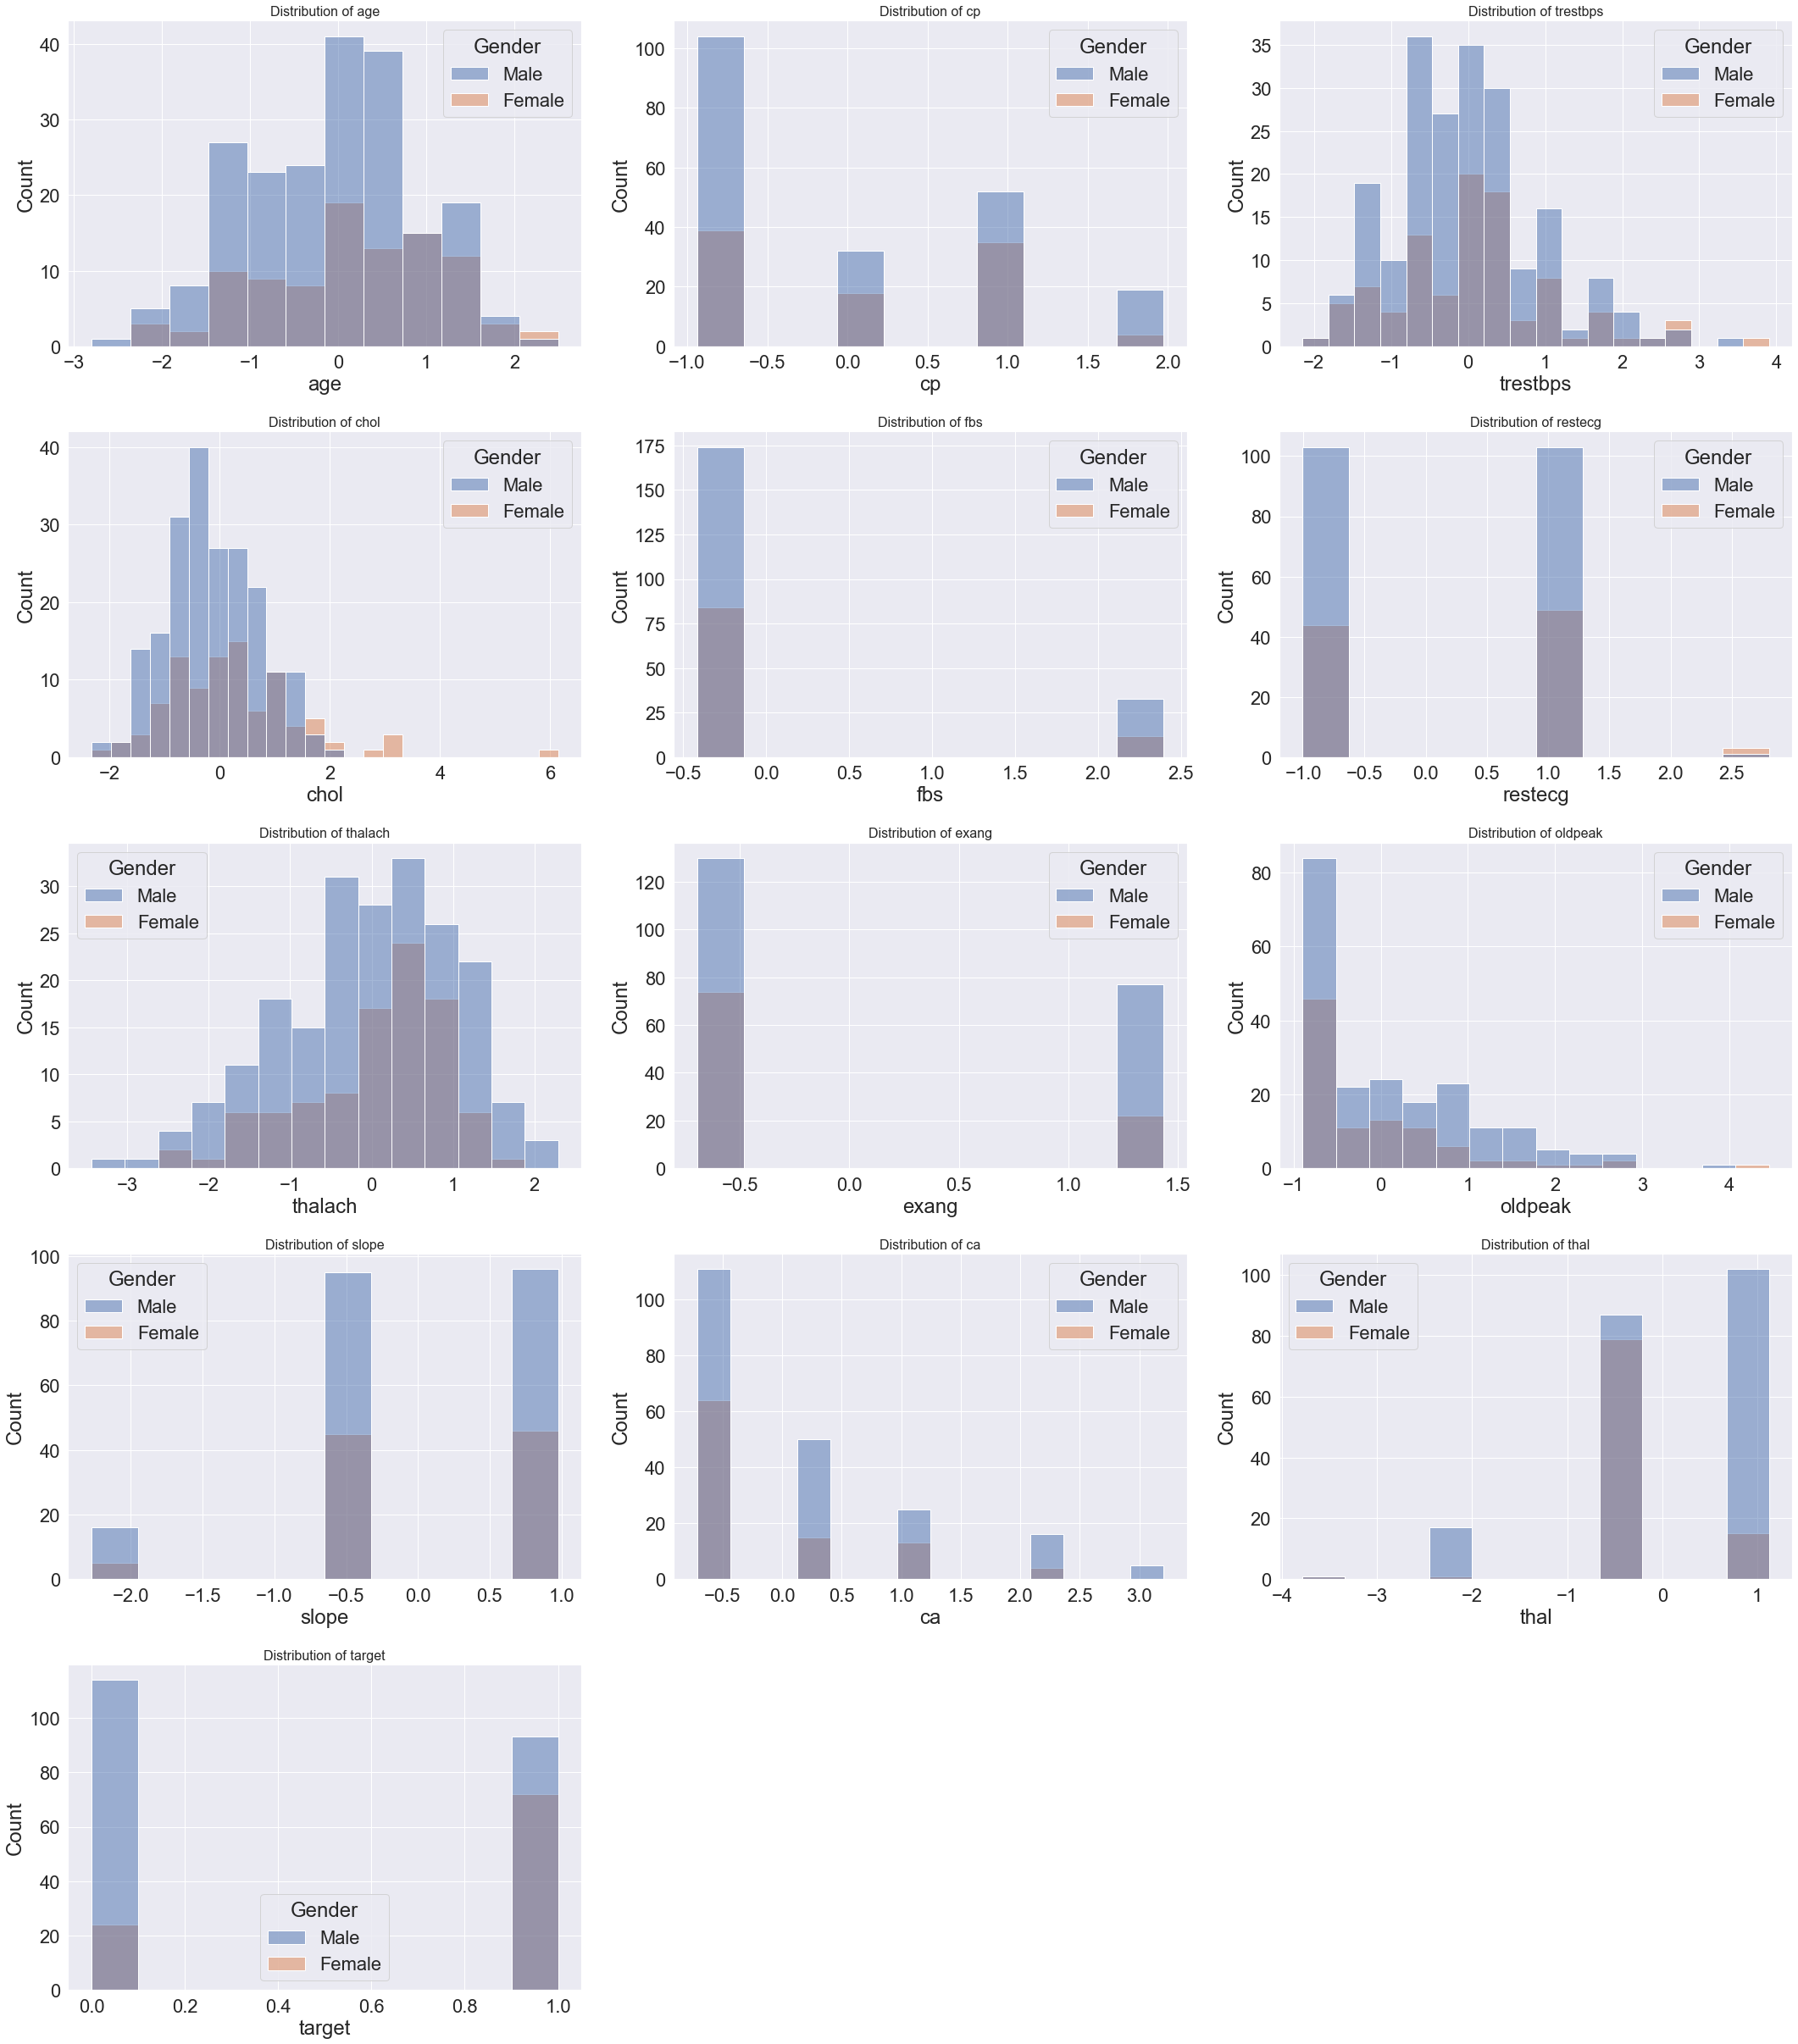

In [126]:
plt.figure(figsize = (30,40))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']:
    plt.subplot(6,3,num)
    sns.histplot(data=df_ss, x=cols, hue='Gender') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


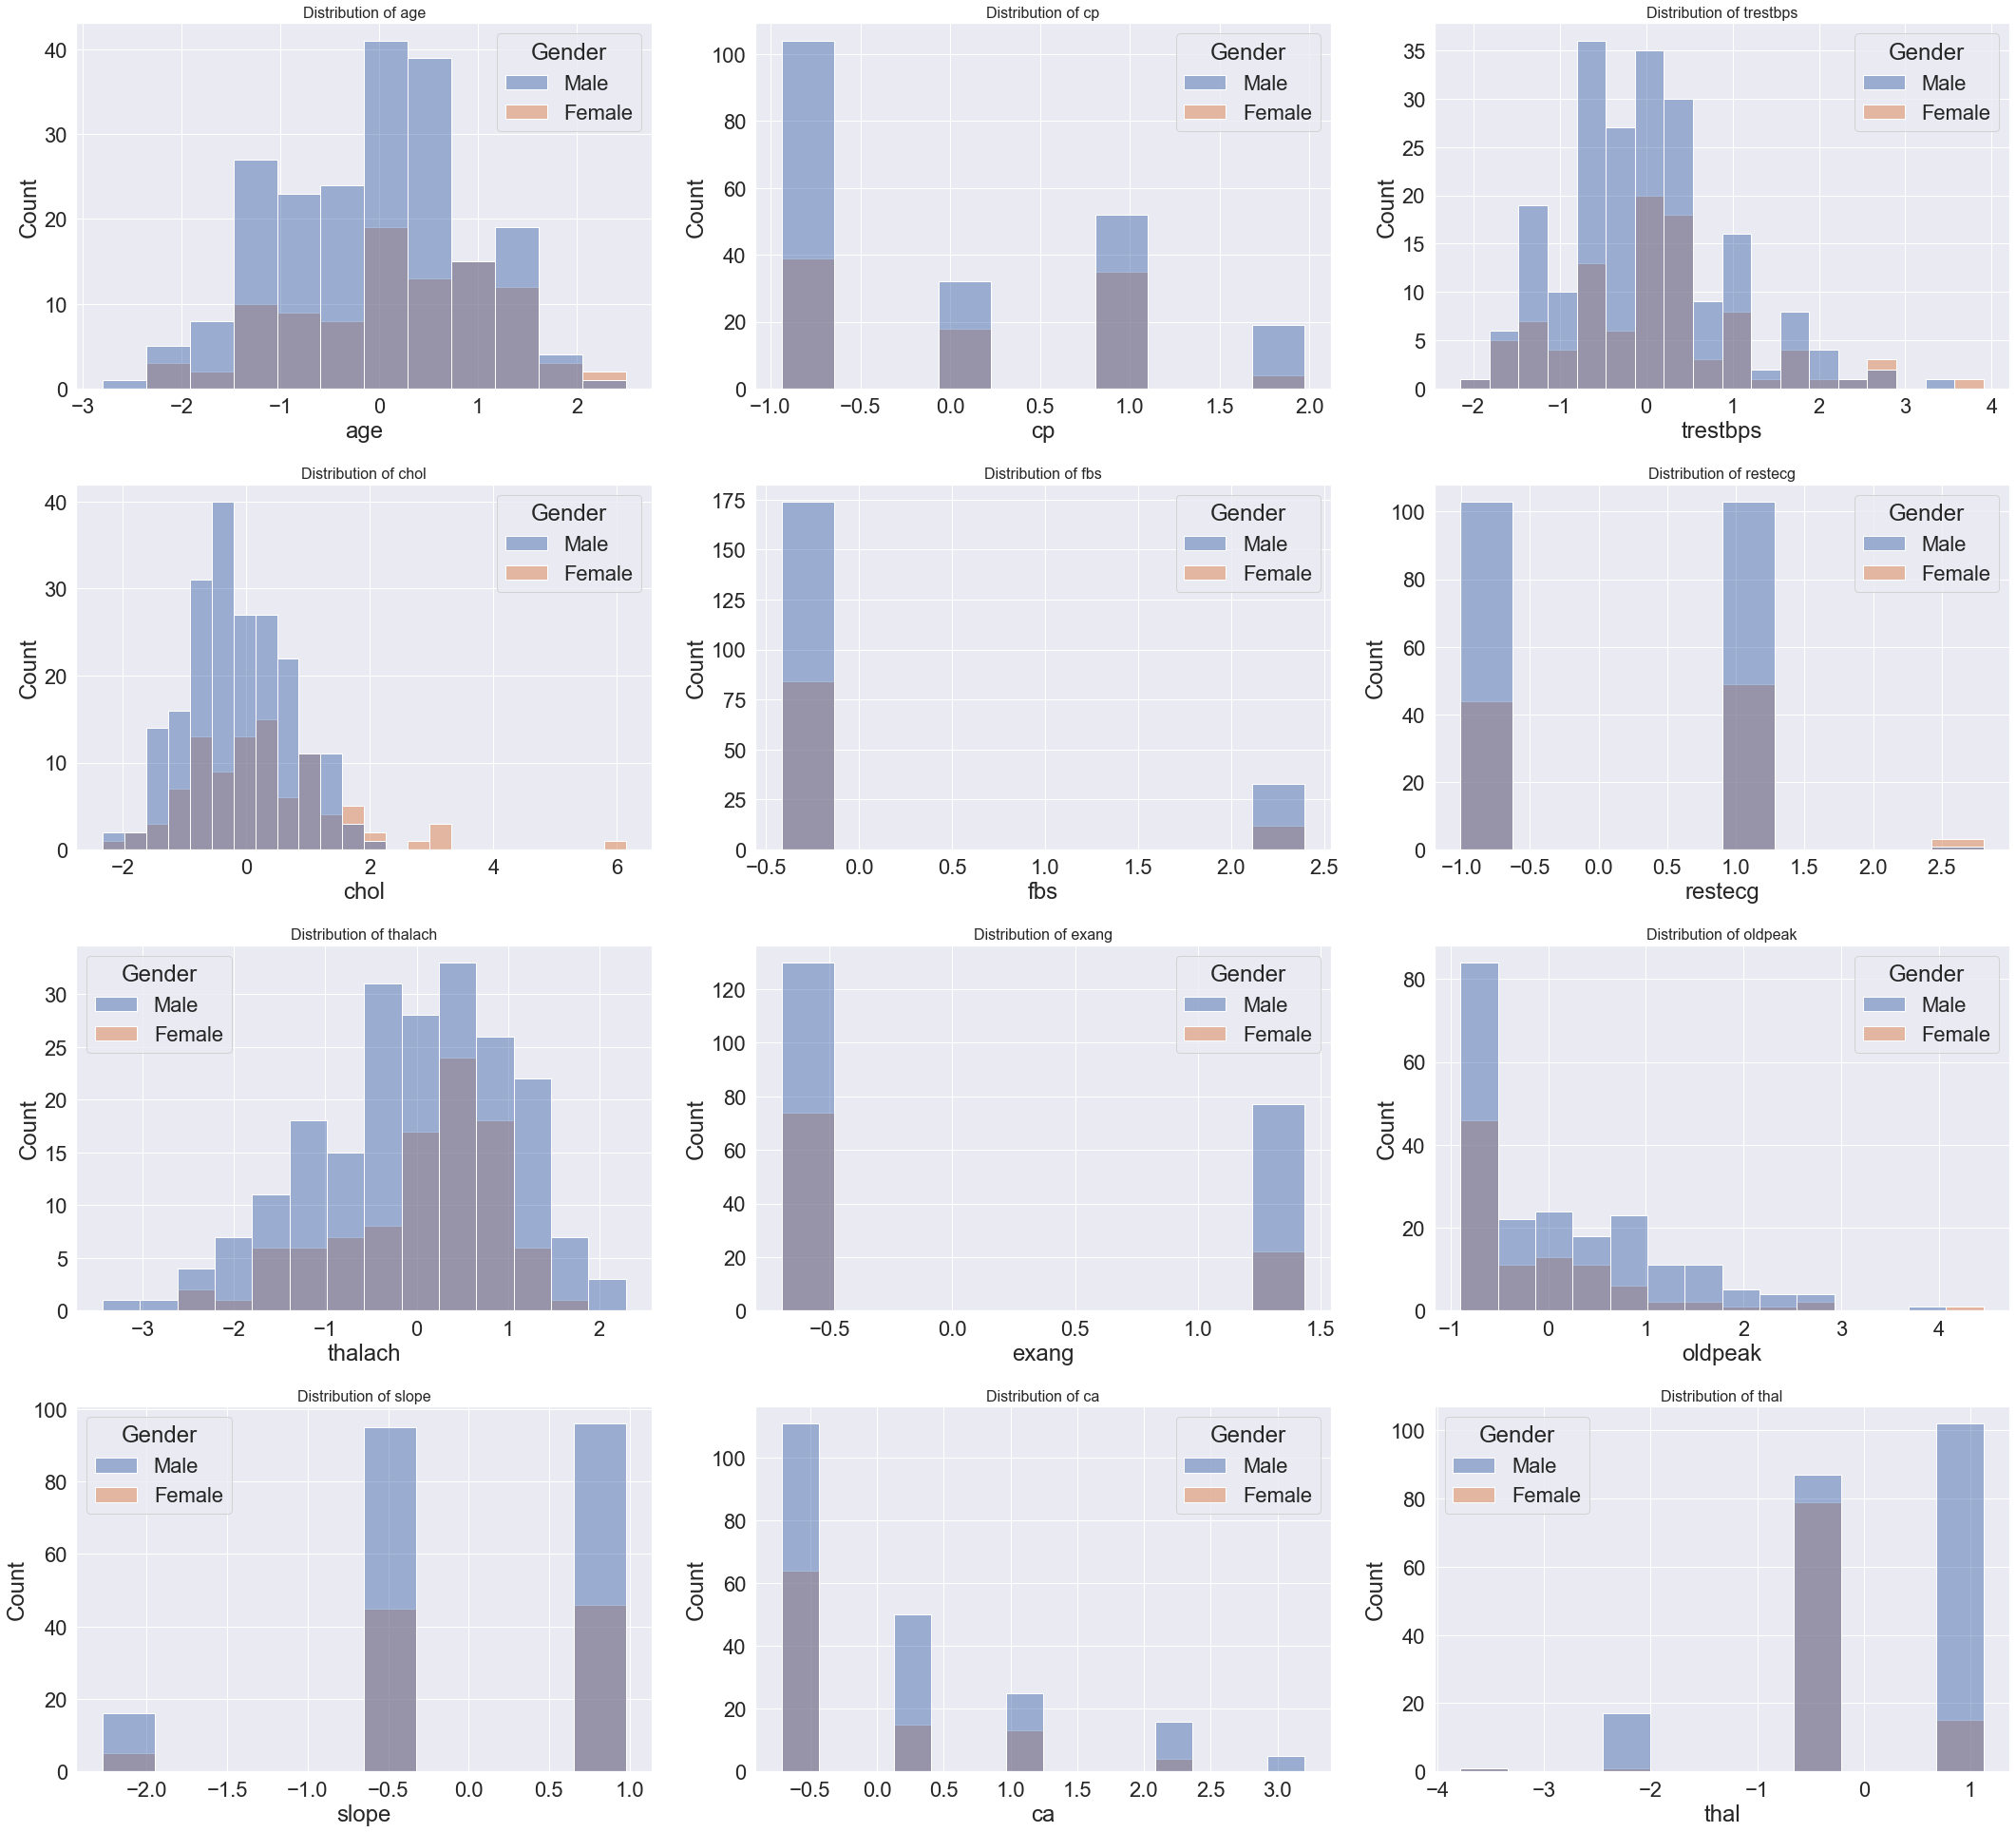

In [127]:
plt.figure(figsize = (30,40))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    plt.subplot(6,3,num)
    sns.histplot(data=df_ss, x=cols, hue='Gender') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


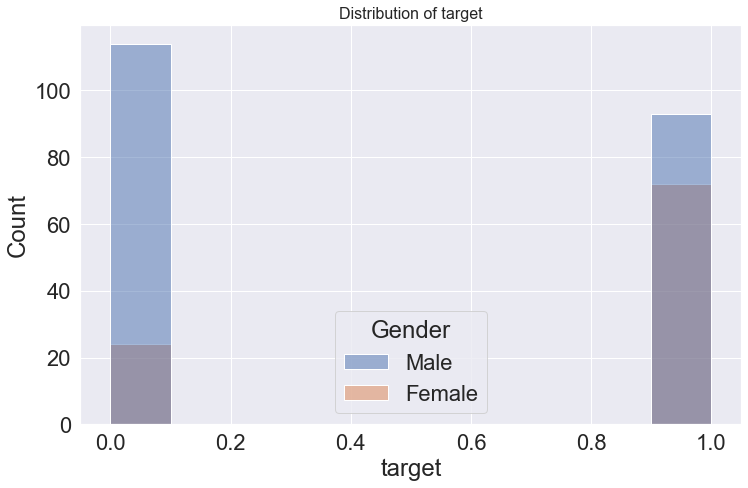

In [128]:
plt.figure(figsize = (30,40))
# Plotting histogram of each individual columns to check for outliers
num = 1
for cols in ['target']:
    plt.subplot(6,3,num)
    sns.histplot(data=df_ss, x=cols, hue='Gender') 
    plt.title(f'Distribution of {cols}', size = 16)
    num +=1
plt.tight_layout();


In [27]:
df_ss.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex_orig'],
      dtype='object')

In [28]:
X=['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','sex_orig']
y=['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_ss[X], df_ss[y], random_state = 42)

In [30]:
model=RandomForestClassifier(random_state=42)

In [31]:
model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [32]:
model.score(X_test,y_test)

0.8552631578947368

In [34]:
params= {
    'n_estimators':range(100, 150, 2),
    'criterion': ['gini','entropy'],
    'max_depth': range(3,5),
    'class_weight':['balanced','balanced_subsample',None]
}

In [35]:
x = range(100, 150, 2)

In [36]:
best_model=GridSearchCV(model,params,scoring='f1')

In [37]:
best_model.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 5),
                         'n_estimators': range(100, 150, 2)},
             scoring='f1')

In [38]:
best_model.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=136, random_state=42)

In [39]:
best_model_test=RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=1, n_estimators=132, random_state=42)

In [40]:
best_model_test.fit(X_train,y_train.values.ravel())

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=1, n_estimators=132, random_state=42)

In [41]:
best_model_test.score(X_test,y_test)

0.8552631578947368

In [42]:
best_model_test.feature_importances_

array([0.03787879, 0.18939394, 0.        , 0.        , 0.        ,
       0.        , 0.09848485, 0.16666667, 0.12878788, 0.04545455,
       0.20454545, 0.10606061, 0.02272727])

In [43]:
df_ss[X].columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'sex_orig'],
      dtype='object')

In [44]:
model2=DecisionTreeClassifier(random_state=42)
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8026315789473685

In [46]:
tree_params = {
    'max_depth':range(1,100,10),
    'min_samples_split': range(10,150,10)
}

In [47]:
params_tree=DecisionTreeClassifier(random_state=42)
model_tree=GridSearchCV(params_tree,tree_params)

In [48]:
model_tree.fit(X_train,y_train)
model_tree.score(X_test,y_test)

0.7894736842105263

In [49]:
model_tree.best_params_

{'max_depth': 11, 'min_samples_split': 20}

In [50]:
best_model_DecTree=DecisionTreeClassifier(max_depth=11,min_samples_split=20,random_state=42)

In [51]:
best_model_DecTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=20, random_state=42)

In [52]:
best_model_DecTree.score(X_test,y_test)

0.7894736842105263

In [53]:
print('Accuracy: %.4f' % accuracy_score(y_test, best_model_DecTree.predict(X_test)))

Accuracy: 0.7895


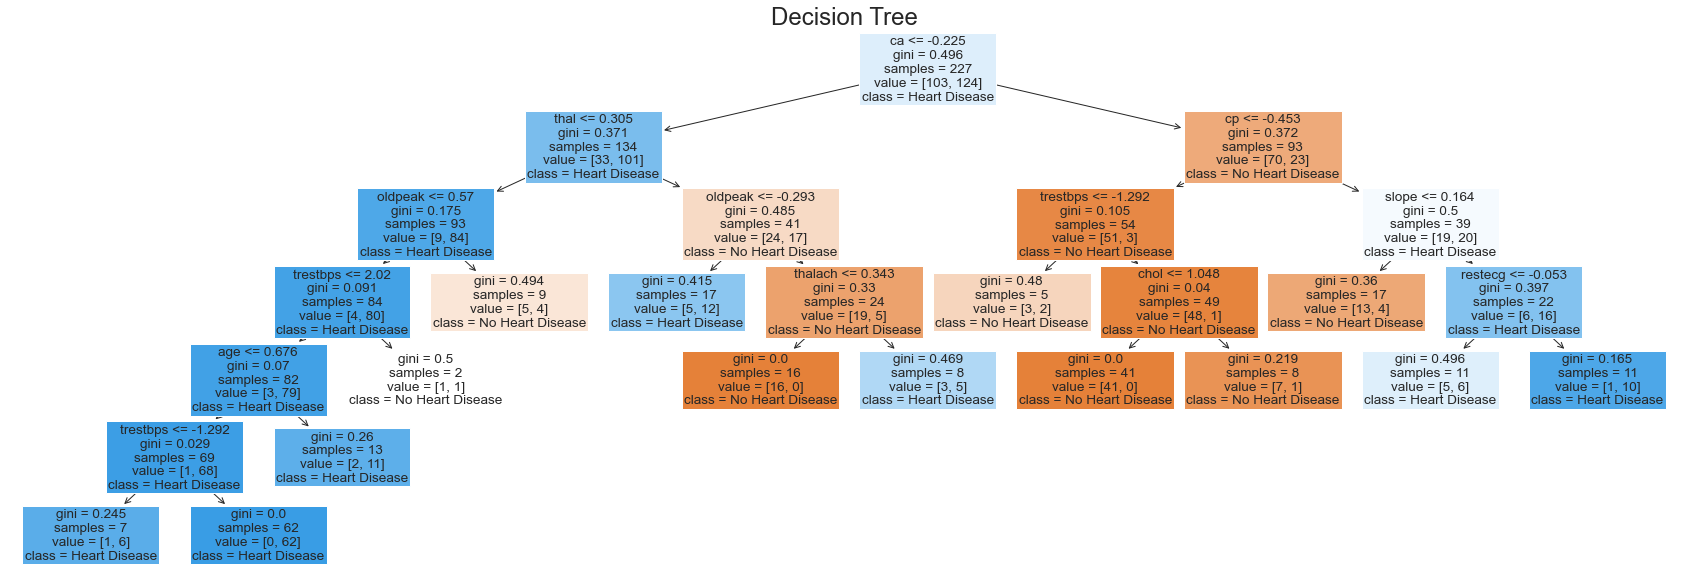

Accuracy: 0.7895


In [150]:
plt.figure(figsize=(30,10))
tree.plot_tree(best_model_DecTree,feature_names=X,class_names=['No Heart Disease','Heart Disease'],filled=True)
plt.title('Decision Tree')
plt.show()
print('Accuracy: %.4f' % accuracy_score(y_test, best_model_DecTree.predict(X_test)))

In [ ]:
models_test = [LinearRegression(),SVC()]
target_col = "diagnosis"
X=df[[col for col in df.columns if col != "id" and col !="diagnosis" ]] 
y=df[target_col]
for m in models_test:
    train_and_score_model(m,X,y)

In [182]:
tree=DecisionTreeClassifier()
bag= BaggingClassifier(base_estimator=best_model_DecTree,
                      n_estimators=100,
                      max_samples=0.8,
                      max_features=0.8)

In [183]:
bag.fit(X_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,
                                                        min_samples_split=20,
                                                        random_state=42),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [184]:
bag.score(X_test,y_test)

0.8421052631578947

In [185]:
tree.fit(X_train,y_train).score(X_test,y_test)

0.7631578947368421

In [186]:
bag.fit(X_train,y_train.values.ravel()).score(X_test,y_test)

0.8421052631578947

In [179]:
boost= AdaBoostClassifier(algorithm='SAMME')

In [83]:
xgb=XGBClassifier()


In [85]:
xgb.fit(X_train,y_train.values.ravel())

[00:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
xgb.score(X_test,y_test)

0.8157894736842105

In [180]:
boost.fit(X_train,y_train.values.ravel())

AdaBoostClassifier(algorithm='SAMME')

In [96]:
boost.score(X_test,y_test)

0.8026315789473685

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
from sklearn import svm

In [162]:
svc = svm.SVC()

ValueError: Filler values must be provided when X has more than 2 training features.

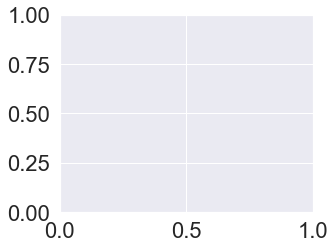

In [171]:
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=%d)' % i for i in num_est]

fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

for n_est, label, grd in zip(num_est, label, grid):     
    boost = AdaBoostClassifier(base_estimator = svc, n_estimators = n_est,algorithm='SAMME')   
    boost.fit(X_train, y_train.values.ravel())
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = np.array(X_train), y = y_train.values.ravel(), clf = boosting, legend = 2)
    plt.title(label)

plt.show()

training for model: AdaBoostClassifier


Score for AdaBoostClassifier:
81.57894736842105


Text(0.5, 1.0, 'Confusion Matrix for AdaBoostClassifier\n Accuracy : 81.58%')

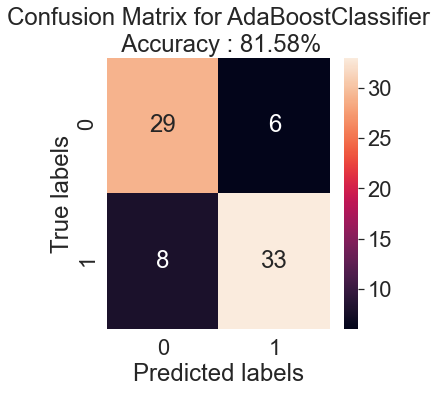

In [181]:

model=boost
model_name=model.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
model.fit(X_train,y_train.values.ravel())
score = model.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

training for model: XGBClassifier


[23:28:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for XGBClassifier:
81.57894736842105


C:\Users\YC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Text(0.5, 1.0, 'Confusion Matrix for XGBClassifier\n Accuracy : 81.58%')

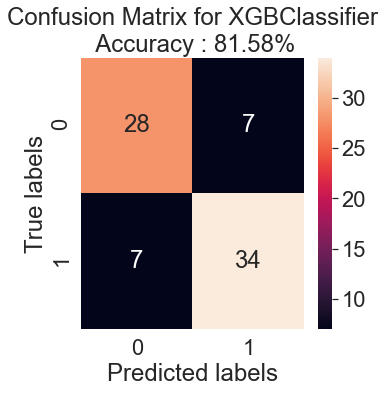

In [120]:

model2=xgb
model_name=model2.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
model2.fit(X_train,y_train.values.ravel())
score = model2.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model2.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

training for model: BaggingClassifier


Score for BaggingClassifier:
84.21052631578947


Text(0.5, 1.0, 'Confusion Matrix for BaggingClassifier\n Accuracy : 84.21%')

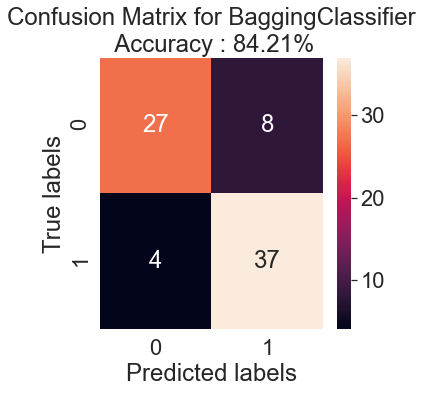

In [187]:

model3=bag
model_name=model3.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
model3.fit(X_train,y_train.values.ravel())
score = model3.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model3.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

training for model: DecisionTreeClassifier


Score for DecisionTreeClassifier:
78.94736842105263


Text(0.5, 1.0, 'Confusion Matrix for DecisionTreeClassifier\n Accuracy : 78.95%')

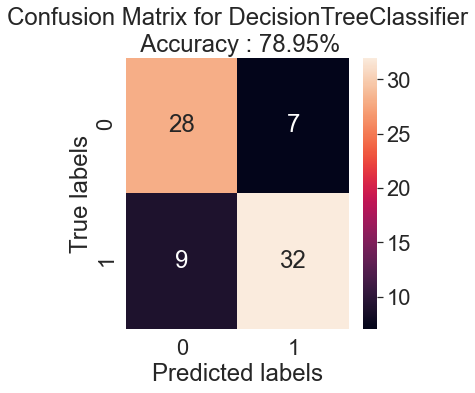

In [153]:

model4=best_model_DecTree
model_name=model4.__class__.__name__
    
print(f"training for model: {model_name}\n\n")
    
model4.fit(X_train,y_train.values.ravel())
score = model4.score(X_test,y_test)*100
    
print(f"Score for {model_name}:\n{score}")
    
y_pred=model4.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
ax=plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

In [114]:
from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import matplotlib.gridspec as gridspec
import itertools

In [110]:
np.random.seed(0)
clf1 = KNeighborsClassifier(n_neighbors = 1)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1)
clf3 = GaussianNB()
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs')
sclf = StackingClassifier(
    classifiers = [clf1, clf2, clf3],
    meta_classifier = lr)

Accuracy: 0.78 (+/- 0.02) [K-NN]


ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

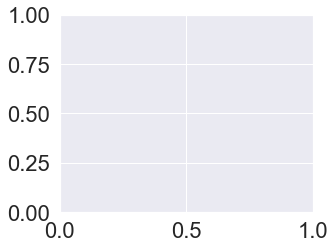

In [117]:
label = ['K-NN', 'Random Forest', 'Naïve Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0, 1], repeat = 2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X_test, y_test.values.ravel(), cv = 3, scoring = 'accuracy')
    print('Accuracy: %.2f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_test, y_test.values.ravel())
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_test, y = y_test.values.ravel(), clf = clf)
    plt.title(label)

plt.show()